# Case study on Supervised learning
Do the following in the iris dataset.




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read the dataset to the python environment.

In [2]:
data = pd.read_excel(r'C:\Users\ADAM\Downloads\iris.xls')
df= pd.DataFrame(data, columns= ['SL','SW','PL','PW','Classification'])
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
for i in df.columns:
    print(i,df[i].unique())

SL [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
SW [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
PL [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
PW [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
Classification ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [5]:
setosa=df[df['Classification'] == 'Iris-versicolor']
versicolor=df[df['Classification'] == 'Iris-versicolor']
virginica=df[df['Classification'] == 'Iris-virginica']
print("setosa\n",setosa.describe())
print("versicolor\n",versicolor.describe())
print("virginica\n",versicolor.describe())

setosa
               SL         SW         PL         PW
count  50.000000  50.000000  50.000000  50.000000
mean    5.936000   2.770000   4.260000   1.326000
std     0.516171   0.313798   0.469911   0.197753
min     4.900000   2.000000   3.000000   1.000000
25%     5.600000   2.525000   4.000000   1.200000
50%     5.900000   2.800000   4.350000   1.300000
75%     6.300000   3.000000   4.600000   1.500000
max     7.000000   3.400000   5.100000   1.800000
versicolor
               SL         SW         PL         PW
count  50.000000  50.000000  50.000000  50.000000
mean    5.936000   2.770000   4.260000   1.326000
std     0.516171   0.313798   0.469911   0.197753
min     4.900000   2.000000   3.000000   1.000000
25%     5.600000   2.525000   4.000000   1.200000
50%     5.900000   2.800000   4.350000   1.300000
75%     6.300000   3.000000   4.600000   1.500000
max     7.000000   3.400000   5.100000   1.800000
virginica
               SL         SW         PL         PW
count  50.000000  5

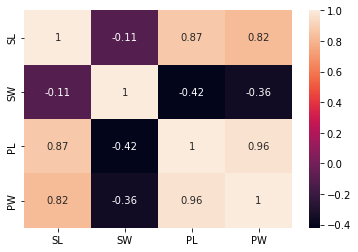

In [6]:
import seaborn as sns
sns.heatmap(df.corr(), annot = True);

## 2. Do necessary pre-processing steps.

In [7]:
from sklearn.model_selection import train_test_split
# df=pd.get_dummies(df,prefix="Species",columns=["Classification"])
df_target = df['Classification'] 
df_feature =df.drop(['Classification'], axis = 1)
df_target = df_target.replace(['Iris-setosa', 'Iris-versicolor','Iris-virginica'], [0,1,2])

In [8]:
df_feature

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
df_target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Classification, Length: 150, dtype: int64

In [21]:
train = 100
test=len(df.index)-train
X_train, X_test, y_train, y_test = train_test_split(df_feature, df_target, stratify = df_target, test_size=test)
print ("Training set =",X_train.shape[0]," samples.")
print ("Testing set =",X_test.shape[0]," samples.")

Training set = 100  samples.
Testing set = 50  samples.


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [23]:
df_target.value_counts(normalize= True)

0    0.333333
1    0.333333
2    0.333333
Name: Classification, dtype: float64

## 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score

logireg = LogisticRegression()
DesTr = DecisionTreeClassifier(random_state=42)
GausNB = GaussianNB()
SvM = SVC(random_state=42)
RfC=RandomForestClassifier(n_estimators=100)

DesTr.fit(X_train, y_train)
DesTr_y_pred_train = DesTr.predict(X_train)
DesTr_y_pred_test = DesTr.predict(X_test)


GausNB.fit(X_train, y_train)
GausNB_y_pred_train = GausNB.predict(X_train)
GausNB_y_pred_test = GausNB.predict(X_test)

SvM.fit(X_train, y_train)
SvM_y_pred_train = SvM.predict(X_train)
SvM_y_pred_test = SvM.predict(X_test)

RfC.fit(X_train,y_train)
RfC_y_pred_train=RfC.predict(X_train)
RfC_y_pred_test=RfC.predict(X_test)

logireg.fit(X_train, y_train)
logireg.score(X_test, y_test)
logireg_y_pred_train = logireg.predict(X_train)
logireg_y_pred_test = logireg.predict(X_test)


print("DecisionTree Accuracy:",metrics.accuracy_score(y_test, DesTr_y_pred_test))
print("GaussianNB Accuracy:",metrics.accuracy_score(y_test, GausNB_y_pred_test))
print("SVC Accuracy:",metrics.accuracy_score(y_test, SvM_y_pred_test))
print("RandomForest Accuracy:",metrics.accuracy_score(y_test, RfC_y_pred_test))
print("LogisticRegression Accuracy:",metrics.accuracy_score(y_test, logireg_y_pred_test))

DecisionTree Accuracy: 0.98
GaussianNB Accuracy: 0.94
SVC Accuracy: 0.98
RandomForest Accuracy: 0.98
LogisticRegression Accuracy: 0.98


In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

scores = cross_val_score(logireg, X_train, y_train, cv=10)
print(np.mean(scores),"\n\n")

df_coef = pd.DataFrame(logireg.coef_, columns=X_train.columns)
print(df_coef,"\n\n")


probs = logireg.predict_proba(X_test)
Y_pp = pd.DataFrame(logireg.predict_proba(X_test), columns=['class_0_pp', 'class_1_pp', 'class_2_pp'])
print(Y_pp.head())

0.9400000000000001 


         SL        SW        PL        PW
0 -0.923797  1.010487 -1.681487 -1.602986
1  0.404118 -0.425372 -0.166640 -0.665304
2  0.519678 -0.585115  1.848127  2.268291 


   class_0_pp  class_1_pp  class_2_pp
0    0.000052    0.031932    0.968016
1    0.000030    0.008781    0.991189
2    0.013765    0.858951    0.127285
3    0.066568    0.833403    0.100029
4    0.967199    0.032799    0.000001


In [26]:
DesTr_compare_df = pd.DataFrame({'actual': y_test, 'predicted': DesTr_y_pred_test})
DesTr_compare_df = DesTr_compare_df.reset_index(drop = True)
print("\nDecisionTree\n",DesTr_compare_df,"\n\n")
print(classification_report(y_test, DesTr_y_pred_test),"\n\n")
print(pd.DataFrame(confusion_matrix(y_test, DesTr_y_pred_test, labels=[2, 1, 0]),index=[2, 1, 0], columns=[2, 1, 0]),"\n**************************************\n")

GausNB_compare_df = pd.DataFrame({'actual': y_test, 'predicted': GausNB_y_pred_test})
GausNB_compare_df = GausNB_compare_df.reset_index(drop = True)
print("\nGaussianNB\n",GausNB_compare_df,"\n\n")
print(classification_report(y_test, GausNB_y_pred_test),"\n\n")
print(pd.DataFrame(confusion_matrix(y_test, GausNB_y_pred_test, labels=[2, 1, 0]),index=[2, 1, 0], columns=[2, 1, 0]),"\n**************************************\n")


SvM_compare_df = pd.DataFrame({'actual': y_test, 'predicted': SvM_y_pred_test})
SvM_compare_df = SvM_compare_df.reset_index(drop = True)
print("\nSVC\n",SvM_compare_df,"\n\n")
print(classification_report(y_test, SvM_y_pred_test),"\n\n")
print(pd.DataFrame(confusion_matrix(y_test, SvM_y_pred_test, labels=[2, 1, 0]),index=[2, 1, 0], columns=[2, 1, 0]),"\n**************************************\n")

RfC_compare_df = pd.DataFrame({'actual': y_test, 'predicted': RfC_y_pred_test})
RfC_compare_df = RfC_compare_df.reset_index(drop = True)
print("\nRandomForest\n",RfC_compare_df,"\n\n")
print(classification_report(y_test, RfC_y_pred_test),"\n\n")
print(pd.DataFrame(confusion_matrix(y_test, RfC_y_pred_test, labels=[2, 1, 0]),index=[2, 1, 0], columns=[2, 1, 0]),"\n**************************************\n")

logireg_compare_df = pd.DataFrame({'actual': y_test, 'predicted': logireg_y_pred_test})
logireg_compare_df = logireg_compare_df.reset_index(drop = True)
print("\nLogisticRegression\n",logireg_compare_df)
print(classification_report(y_test, logireg_y_pred_test),"\n\n")
print(pd.DataFrame(confusion_matrix(y_test, logireg_y_pred_test, labels=[2, 1, 0]),index=[2, 1, 0], columns=[2, 1, 0]),"\n**************************************\n")



DecisionTree
     actual  predicted
0        2          2
1        2          2
2        1          1
3        1          1
4        0          0
5        0          0
6        0          0
7        2          2
8        0          0
9        0          0
10       1          1
11       2          2
12       1          1
13       1          1
14       1          1
15       0          0
16       1          1
17       0          0
18       1          1
19       1          1
20       2          2
21       2          2
22       2          2
23       0          0
24       2          2
25       1          1
26       0          0
27       2          2
28       0          0
29       0          0
30       0          0
31       2          2
32       2          1
33       0          0
34       1          1
35       1          1
36       0          0
37       0          0
38       2          2
39       2          2
40       0          0
41       2          2
42       0          0
43       2       

## 'Iris-setosa'=0 
## 'Iris-versicolor'=1
## 'Iris-virginica'=2

In [27]:
species_idx = RfC.predict([[3, 5, 4, 2]])[0]
species_idx

2

In [28]:
species_idx = SvM.predict([[3, 5, 4, 2]])[0]
species_idx

2

In [29]:
species_id = DesTr.predict([[5, 3, 1, 0.2]])[0]
species_id

2

In [30]:
species_id = SvM.predict([[0.5, 0.3, 1, 0.2]])[0]
species_id

1

In [20]:
species_id = logireg.predict([[0.5, 0.3, 1, 0.2]])[0]
species_id

1